# **Final Python NoteBook 1: Data Cleaning & Classification**



Author: Nelith Nethsanda

Uow ID:w2051741

IIT ID:20230664

Reviewed by: Sonal Pathinayaka

Date of Review: 2nd of March 2025  

Notebook Purpose: Cleaning, preprocessing, encoding, and splitting the SEER breast cancer dataset into classification and regression sets for mortality and survival months prediction.

In [154]:
import pandas as pd

In [155]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [156]:
data = pd.read_csv('/content/5DATA002W.2 Coursework Dataset(25012025v6.0) (2).csv')
print(data.head())

  Patient_ID  Month_of_Birth   Age     Sex   Occupation T_Stage N_Stage  \
0      A0012              12  68.0  Female     Teaching      T1      N1   
1      A0013              12  50.0  Female      Medical      T2      N2   
2      A0014              11  58.0  Female  Engineering      T3      N3   
3      A0015               3  58.0  Female   Technology      T1      N1   
4      A0016               1  47.0  Female   Multimedia      T2      N1   

  6th_Stage             Differentiated  Grade   A_Stage  Tumor_Size  \
0       IIA      Poorly differentiated      3  Regional         4.0   
1      IIIA  Moderately differentiated      2  Regional        35.0   
2      IIIC  Moderately differentiated      2  Regional        63.0   
3       IIA      Poorly differentiated      3  Regional        18.0   
4       IIB      Poorly differentiated      3  Regional        41.0   

  Estrogen_Status Progesterone_Status  Regional_Node_Examined  \
0        Positive            Positive                    

In [157]:
data.isnull().sum()

,0
Patient_ID,0
Month_of_Birth,0
Age,9
Sex,4
Occupation,3981
T_Stage,0
N_Stage,0
6th_Stage,0
Differentiated,0
Grade,0


In [158]:
data.describe()

,Month_of_Birth,Age,Grade,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months
count,4024.000000,4015.000000,4024.000000,4021.000000,4023.000000,4024.000000,4024.000000
mean,6.481362,54.107098,2.150596,30.419299,14.373602,4.158052,71.472167
std,3.475442,11.715528,0.638234,21.161080,8.129293,5.109331,25.361855
min,1.000000,-50.000000,1.000000,-75.000000,1.000000,1.000000,1.000000
25%,3.000000,47.000000,2.000000,16.000000,9.000000,1.000000,56.000000
50%,6.000000,54.000000,2.000000,25.000000,14.000000,2.000000,73.000000
75%,10.000000,61.000000,3.000000,38.000000,19.000000,5.000000,90.000000
max,12.000000,502.000000,4.000000,140.000000,61.000000,46.000000,760.000000


In [159]:
print("Missing values in Tumor_Size:", data['Tumor_Size'].isnull().sum())
print(data['Tumor_Size'].describe())

Missing values in Tumor_Size: 3
count    4021.000000
mean       30.419299
std        21.161080
min       -75.000000
25%        16.000000
50%        25.000000
75%        38.000000
max       140.000000
Name: Tumor_Size, dtype: float64


In [160]:
# Replace negatives with NaN and fill with median
data['Tumor_Size'] = data['Tumor_Size'].apply(lambda x: x if x >= 0 else np.nan)
data['Tumor_Size'] = data['Tumor_Size'].fillna(data['Tumor_Size'].median())

In [161]:
# Check summary and outliers after cleaning
print("Missing values in Tumor_Size (after):", data['Tumor_Size'].isnull().sum())
print(data['Tumor_Size'].describe())

Missing values in Tumor_Size (after): 0
count    4024.000000
mean       30.440109
std        21.088474
min         1.000000
25%        16.000000
50%        25.000000
75%        38.000000
max       140.000000
Name: Tumor_Size, dtype: float64


In [162]:
# Check for missing values in Age before fix
print("Missing values in Age:", data['Age'].isnull().sum())

# Check min, max, and negative values before fix
print(data['Age'].describe())


Missing values in Age: 9
count    4015.000000
mean       54.107098
std        11.715528
min       -50.000000
25%        47.000000
50%        54.000000
75%        61.000000
max       502.000000
Name: Age, dtype: float64


In [163]:
# Replace negative ages with NaN and impute with median
data['Age'] = data['Age'].apply(lambda x: x if x >= 0 else np.nan)
data['Age'] = data['Age'].fillna(data['Age'].median())


In [164]:
# Confirm missing and negative values fixed
print("Missing values in Age (after):", data['Age'].isnull().sum())
print(data['Age'].describe())


Missing values in Age (after): 0
count    4024.000000
mean       54.132704
std        11.586709
min        30.000000
25%        47.000000
50%        54.000000
75%        61.000000
max       502.000000
Name: Age, dtype: float64


In [165]:
# Check for missing and negative values, outliers in Regional_Node_Examined
print("Missing values in Regional_Node_Examined:", data['Regional_Node_Examined'].isnull().sum())
print(data['Regional_Node_Examined'].describe())

Missing values in Regional_Node_Examined: 1
count    4023.000000
mean       14.373602
std         8.129293
min         1.000000
25%         9.000000
50%        14.000000
75%        19.000000
max        61.000000
Name: Regional_Node_Examined, dtype: float64


In [166]:
# Replace negative values with NaN and fill with median
data['Regional_Node_Examined'] = data['Regional_Node_Examined'].apply(lambda x: x if x >= 0 else np.nan)
data['Regional_Node_Examined'] = data['Regional_Node_Examined'].fillna(data['Regional_Node_Examined'].median())


In [167]:
print("Missing values in Regional_Node_Examined (after):", data['Regional_Node_Examined'].isnull().sum())
print(data['Regional_Node_Examined'].describe())


Missing values in Regional_Node_Examined (after): 0
count    4024.000000
mean       14.373509
std         8.128284
min         1.000000
25%         9.000000
50%        14.000000
75%        19.000000
max        61.000000
Name: Regional_Node_Examined, dtype: float64


In [168]:
print("Missing values in Regional_Node_Positive:", data['Reginol_Node_Positive'].isnull().sum())
print(data['Reginol_Node_Positive'].describe())


Missing values in Regional_Node_Positive: 0
count    4024.000000
mean        4.158052
std         5.109331
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        46.000000
Name: Reginol_Node_Positive, dtype: float64


In [169]:
# Show inconsistent values in Sex before cleaning
print(data['Sex'].value_counts())


Sex
Female    4001
1           19
Name: count, dtype: int64


In [170]:
# Combine rare gender entries if applicable
data = data[data['Sex'] == 'Female']

In [171]:
print(data['Sex'].value_counts())

Sex
Female    4001
Name: count, dtype: int64


In [172]:
# Check missing values in Occupation
print("Missing values in Occupation:", data['Occupation'].isnull().sum())


Missing values in Occupation: 3962


In [173]:
# Drop irrelevant column with too many missing values
if 'Occupation' in data.columns:
    data.drop(columns=['Occupation'], inplace=True)


<ipython-input-173-27ceb25f1ae1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Occupation'], inplace=True)


In [174]:
print('Occupation' in data.columns)

False


In [175]:
print(data['Mortality_Status'].value_counts())


Mortality_Status
Alive    3377
Dead      597
DEAD       10
dead        8
ALIVE       5
alive       3
ALive       1
Name: count, dtype: int64


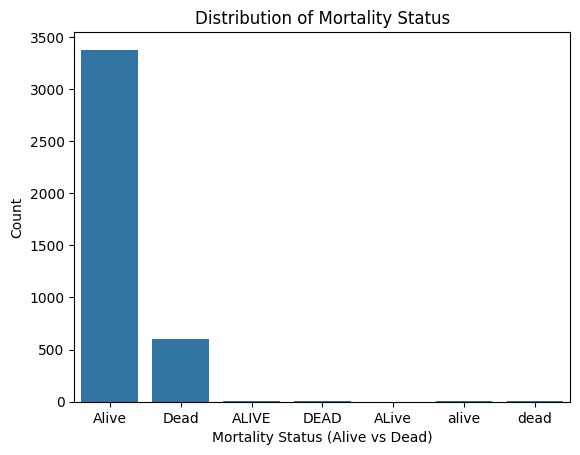

In [176]:
sns.countplot(x='Mortality_Status', data=data)
plt.title('Distribution of Mortality Status')
plt.xlabel('Mortality Status (Alive vs Dead)')
plt.ylabel('Count')
plt.show()

In [177]:
data['Mortality_Status'] = data['Mortality_Status'].str.capitalize()
data['Mortality_Status'] = data['Mortality_Status'].replace({
    'Alive': 'Alive',
    'Dead': 'Dead',
    'ALIVE': 'Alive',
    'DEAD': 'Dead',
    'ALive': 'Alive',
    'alive': 'Alive',
    'dead': 'Dead'
})


In [178]:
print(data['Mortality_Status'].value_counts())


Mortality_Status
Alive    3386
Dead      615
Name: count, dtype: int64


In [179]:
# data['Mortality_Status'] = data['Mortality_Status'].map({'Alive': 0, 'Dead': 1})


In [180]:
print(data['Mortality_Status'].value_counts())


Mortality_Status
Alive    3386
Dead      615
Name: count, dtype: int64


In [181]:
data.describe()

,Month_of_Birth,Age,Grade,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months
count,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000
mean,6.474881,54.126968,2.151962,30.417646,14.387153,4.162959,71.448638
std,3.474540,11.605618,0.637496,21.102009,8.134668,5.120394,25.396504
min,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,47.000000,2.000000,16.000000,9.000000,1.000000,56.000000
50%,6.000000,54.000000,2.000000,25.000000,14.000000,2.000000,73.000000
75%,10.000000,61.000000,3.000000,38.000000,19.000000,5.000000,90.000000
max,12.000000,502.000000,4.000000,140.000000,61.000000,46.000000,760.000000


In [182]:
# Rename "Reginol_Node_Positive" to correct spelling
if 'Reginol_Node_Positive' in data.columns:
    data.rename(columns={'Reginol_Node_Positive': 'Regional_Node_Positive'}, inplace=True)

In [183]:
# Identify Numeric and Categorical Columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns


In [184]:
# Numeric columns: replace missing values with mean
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

In [185]:
# Categorical columns: replace missing values with most frequent
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer.fit_transform(data[categorical_cols])

In [186]:
#Outlier Removal using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [187]:
outlier_cols = ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Regional_Node_Positive', 'Survival_Months']

In [188]:
for col in outlier_cols:
    remove_outliers_iqr(data, col)

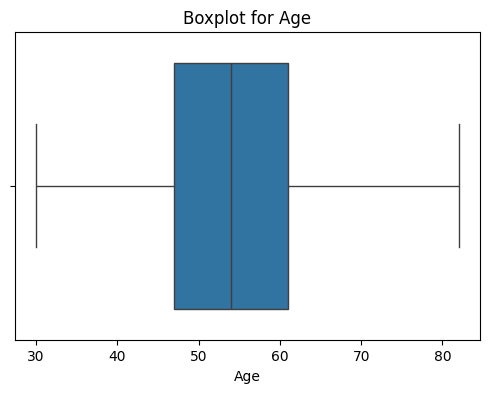

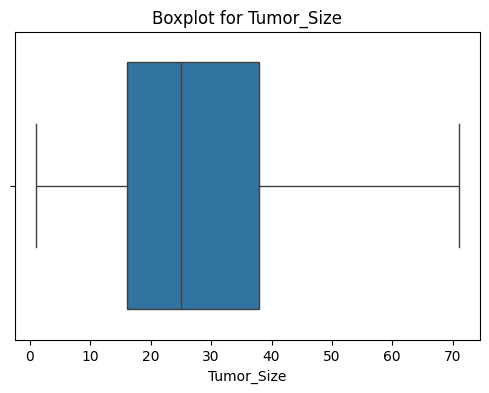

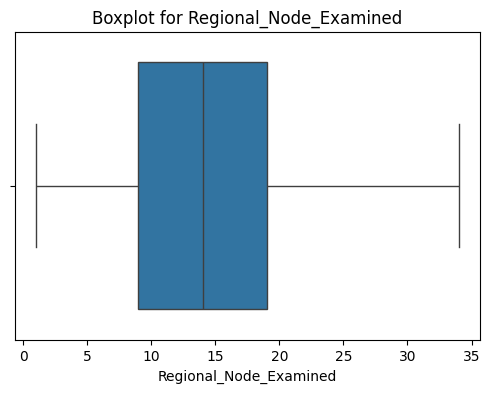

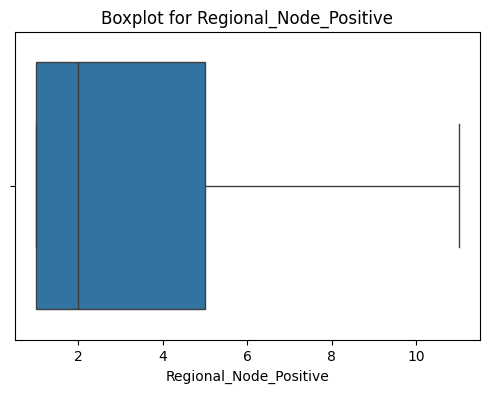

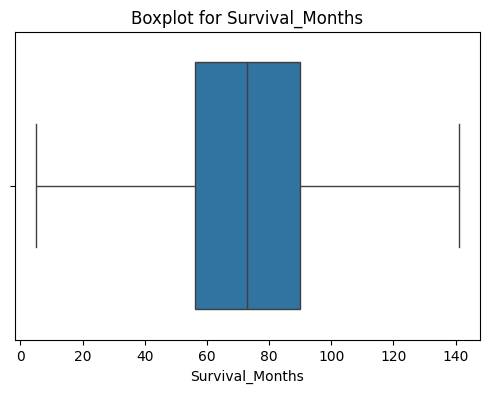

In [189]:

for col in outlier_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [190]:
# Ensure no negative ages, tumor sizes, node counts
for col in ['Age', 'Tumor_Size', 'Regional_Node_Examined']:
    data[col] = data[col].apply(lambda x: x if x >= 0 else np.nan)
    data[col] = data[col].fillna(data[col].median())

In [191]:
data['Sex'] = data['Sex'].replace({'1': 'Male'})
data['Sex'] = data['Sex'].astype('category')

In [192]:
print(data['Mortality_Status'].describe());

count      4001
unique        2
top       Alive
freq       3386
Name: Mortality_Status, dtype: object


In [193]:
print(data['Mortality_Status'].value_counts())


Mortality_Status
Alive    3386
Dead      615
Name: count, dtype: int64


In [194]:
# Remove extreme outliers in 'Survival_Months' again to be safe
Q1 = data['Survival_Months'].quantile(0.25)
Q3 = data['Survival_Months'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
data = data[(data['Survival_Months'] >= lower) & (data['Survival_Months'] <= upper)]

In [195]:
# Normalizing only selected columns (Month_of_Birth dropped later)
features_to_normalize = ['Age', 'Grade', 'Tumor_Size', 'Regional_Node_Examined', 'Regional_Node_Positive', 'Survival_Months']

In [196]:
# scaler = MinMaxScaler()
# data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

In [197]:
# Check and remove duplicate rows before saving
print("Number of duplicate rows:", data.duplicated().sum())
data = data.drop_duplicates()



Number of duplicate rows: 0


In [198]:
# label_encoders = {}
# categorical_cols = ["Sex", "T_Stage", "N_Stage", "6th_Stage", "Differentiated", "A_Stage",
#                     "Estrogen_Status", "Progesterone_Status", "Mortality_Status"]

In [199]:
label_encoders = {}
categorical_cols = ["Sex", "T_Stage", "N_Stage", "6th_Stage", "Differentiated", "A_Stage",
                    "Estrogen_Status", "Progesterone_Status", "Mortality_Status"]

for col in categorical_cols:
    le = LabelEncoder()  # move this line **inside** the loop
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [200]:
for col, encoder in label_encoders.items():
    print(f"\nColumn: {col}")
    for i, cls in enumerate(encoder.classes_):
        print(f"  {cls} ➝ {i}")



Column: Sex
  Female ➝ 0

Column: T_Stage
  T1 ➝ 0
  T2 ➝ 1
  T3 ➝ 2
  T4 ➝ 3

Column: N_Stage
  N1 ➝ 0
  N2 ➝ 1
  N3 ➝ 2

Column: 6th_Stage
  IIA ➝ 0
  IIB ➝ 1
  IIIA ➝ 2
  IIIB ➝ 3
  IIIC ➝ 4

Column: Differentiated
  Moderately differentiated ➝ 0
  Poorly differentiated ➝ 1
  Undifferentiated ➝ 2
  Well differentiated ➝ 3

Column: A_Stage
  Distant ➝ 0
  Regional ➝ 1

Column: Estrogen_Status
  Negative ➝ 0
  Positive ➝ 1

Column: Progesterone_Status
  Negative ➝ 0
  Positive ➝ 1

Column: Mortality_Status
  Alive ➝ 0
  Dead ➝ 1


In [201]:
#Save Cleaned Full Dataset
data.to_csv('cleaned_dataset.csv', index=False)

In [202]:
# Drop irrelevant columns first
classification_data = data.drop(columns=['Survival_Months', 'Patient_ID', 'Month_of_Birth', '6th_Stage'])



In [203]:
regression_data = data.drop(columns=['Mortality_Status', 'Patient_ID', 'Month_of_Birth', '6th_Stage'])

In [204]:
regression_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4001 entries, 0 to 4023
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4001 non-null   float64
 1   Sex                     4001 non-null   int64  
 2   T_Stage                 4001 non-null   int64  
 3   N_Stage                 4001 non-null   int64  
 4   Differentiated          4001 non-null   int64  
 5   Grade                   4001 non-null   float64
 6   A_Stage                 4001 non-null   int64  
 7   Tumor_Size              4001 non-null   float64
 8   Estrogen_Status         4001 non-null   int64  
 9   Progesterone_Status     4001 non-null   int64  
 10  Regional_Node_Examined  4001 non-null   float64
 11  Regional_Node_Positive  4001 non-null   float64
 12  Survival_Months         4001 non-null   float64
dtypes: float64(6), int64(7)
memory usage: 437.6 KB


In [205]:
classification_data.to_csv('classification_dataset.csv', index=False)
regression_data.to_csv('regression_dataset.csv', index=False)

In [206]:
regression_data.head()

,Age,Sex,T_Stage,N_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months
0,68.0,0,0,0,1,3.0,1,4.0,1,1,24.0,1.0,60.0
1,50.0,0,1,1,0,2.0,1,35.0,1,1,14.0,5.0,62.0
2,58.0,0,2,2,0,2.0,1,63.0,1,1,14.0,7.0,75.0
3,58.0,0,0,0,1,3.0,1,18.0,1,1,2.0,1.0,84.0
4,47.0,0,1,0,1,3.0,1,41.0,1,1,3.0,1.0,50.0


In [207]:
print("Classification Dataset:\n", classification_data.head())
print("\nRegression Dataset:\n", regression_data.head())


Classification Dataset:
     Age  Sex  T_Stage  N_Stage  Differentiated  Grade  A_Stage  Tumor_Size  \
0  68.0    0        0        0               1    3.0        1         4.0   
1  50.0    0        1        1               0    2.0        1        35.0   
2  58.0    0        2        2               0    2.0        1        63.0   
3  58.0    0        0        0               1    3.0        1        18.0   
4  47.0    0        1        0               1    3.0        1        41.0   

   Estrogen_Status  Progesterone_Status  Regional_Node_Examined  \
0                1                    1                    24.0   
1                1                    1                    14.0   
2                1                    1                    14.0   
3                1                    1                     2.0   
4                1                    1                     3.0   

   Regional_Node_Positive  Mortality_Status  
0                     1.0                 0  
1          

In [208]:
#Basic descriptive statistics for retained numerical features
print("Descriptive statistics for retained numerical features:\n")
print(classification_data.describe())


Descriptive statistics for retained numerical features:

               Age     Sex      T_Stage      N_Stage  Differentiated  \
count  4001.000000  4001.0  4001.000000  4001.000000     4001.000000   
mean     53.995751     0.0     0.784054     0.438890        0.687828   
std       8.991286     0.0     0.765739     0.694498        1.014039   
min      30.000000     0.0     0.000000     0.000000        0.000000   
25%      47.000000     0.0     0.000000     0.000000        0.000000   
50%      54.000000     0.0     1.000000     0.000000        0.000000   
75%      61.000000     0.0     1.000000     1.000000        1.000000   
max      82.000000     0.0     3.000000     2.000000        3.000000   

             Grade      A_Stage   Tumor_Size  Estrogen_Status  \
count  4001.000000  4001.000000  4001.000000      4001.000000   
mean      2.151962     0.977006    29.293177         0.932767   
std       0.637496     0.149904    17.732788         0.250457   
min       1.000000     0.000000   